<a href="https://colab.research.google.com/github/nabila-nazzy/testing/blob/main/DLEA3CVAppMSN23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DLE305 Assessment 3 MSN 2023:
Extended Functionality CV ML Classifier using Convolutional Neural Networks and Keras in Python

In [ ]:
#mivinmathew, nabilanazar, sohanmaharjan.

In [ ]:
#cats + dogs + lions + tigers classifier.

#Setting up the Environment

*  Loading the neccesary libraries needed for our model.

In [ ]:
import os
import zipfile


In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import glob

In [ ]:
from PIL import Image
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Data PreProcessing

*   Loading the cleaned dataset onto the environment.
*   selection and gathering of data for train/validation split.
*   ensuring variety + diversity of data.
*   Dataset exploration to ensure data is loaded properly.





In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab_Notebooks/CDLTSmallDataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/drive/


This code block showcases the process of splitting the dataset between training and testing datasets between all four animals. This is to format the data so that the data can easily be inputted into the model.

In [ ]:
base_dir = '/tmp/CDLTSmallDataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training lions pictures
train_lions_dir = os.path.join(train_dir, 'lions')

# Directory with our training tigers pictures
train_tigers_dir = os.path.join(train_dir, 'tigers')

# Directory with our validation lions pictures
validation_lions_dir = os.path.join(validation_dir, 'lions')

# Directory with our validation tigers pictures
validation_tigers_dir = os.path.join(validation_dir, 'tigers')

# Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our training dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')


#Dataset Exploration
* To ensure that the dataset and the various directories (train/validation split) are accesible and loaded to the environment properly.

In [ ]:
train_lions_fnames = os.listdir(train_lions_dir)
print(train_lions_fnames[:10])

val_lions_fnames = os.listdir(validation_lions_dir)
print(val_lions_fnames[:10])

train_tigers_fnames = os.listdir(train_tigers_dir)
train_tigers_fnames.sort()

train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_dogs_fnames[:10])

train_cats_fnames = os.listdir(train_cats_dir)
print(train_cats_fnames[:10])

print(train_tigers_fnames[:10])

['lion (193).jpg', 'lion (414).jpg', 'lion (15).png', 'lion (342).jpg', 'lion (22).jpeg', 'lion (851).jpg', 'lion (19).jpg', 'lion (219).jpg', 'lion (265).jpg', 'lion (452).jpg']
['lion (782).jpg', 'lion (799).jpg', 'lion (598).jpg', 'lion (569).jpg', 'lion (606).jpg', 'lion (619).jpg', 'lion (834).jpg', 'lion (648).jpg', 'lion (677).jpg', 'lion (694).jpg']
['dog.161.jpg', 'dog.507.jpg', 'dog.449.jpg', 'dog.415.jpg', 'dog.97.jpg', 'dog.172.jpg', 'dog.104.jpg', 'dog.127.jpg', 'dog.978.jpg', 'dog.999.jpg']
['cat.2411.jpg', 'cat.2444.jpg', 'cat.2460.jpg', 'cat.2057.jpg', 'cat.2067.jpg', 'cat.2379.jpg', 'cat.2254.jpg', 'cat.2079.jpg', 'cat.2479.jpg', 'cat.2122.jpg']
['tiger (1).jpeg', 'tiger (1).jpg', 'tiger (1).png', 'tiger (10).jpeg', 'tiger (100).jpg', 'tiger (101).jpg', 'tiger (102).jpg', 'tiger (1021).jpg', 'tiger (103).jpg', 'tiger (1037).jpg']


*  Displaying only dogs and cats to check if the images are indeed loaded.

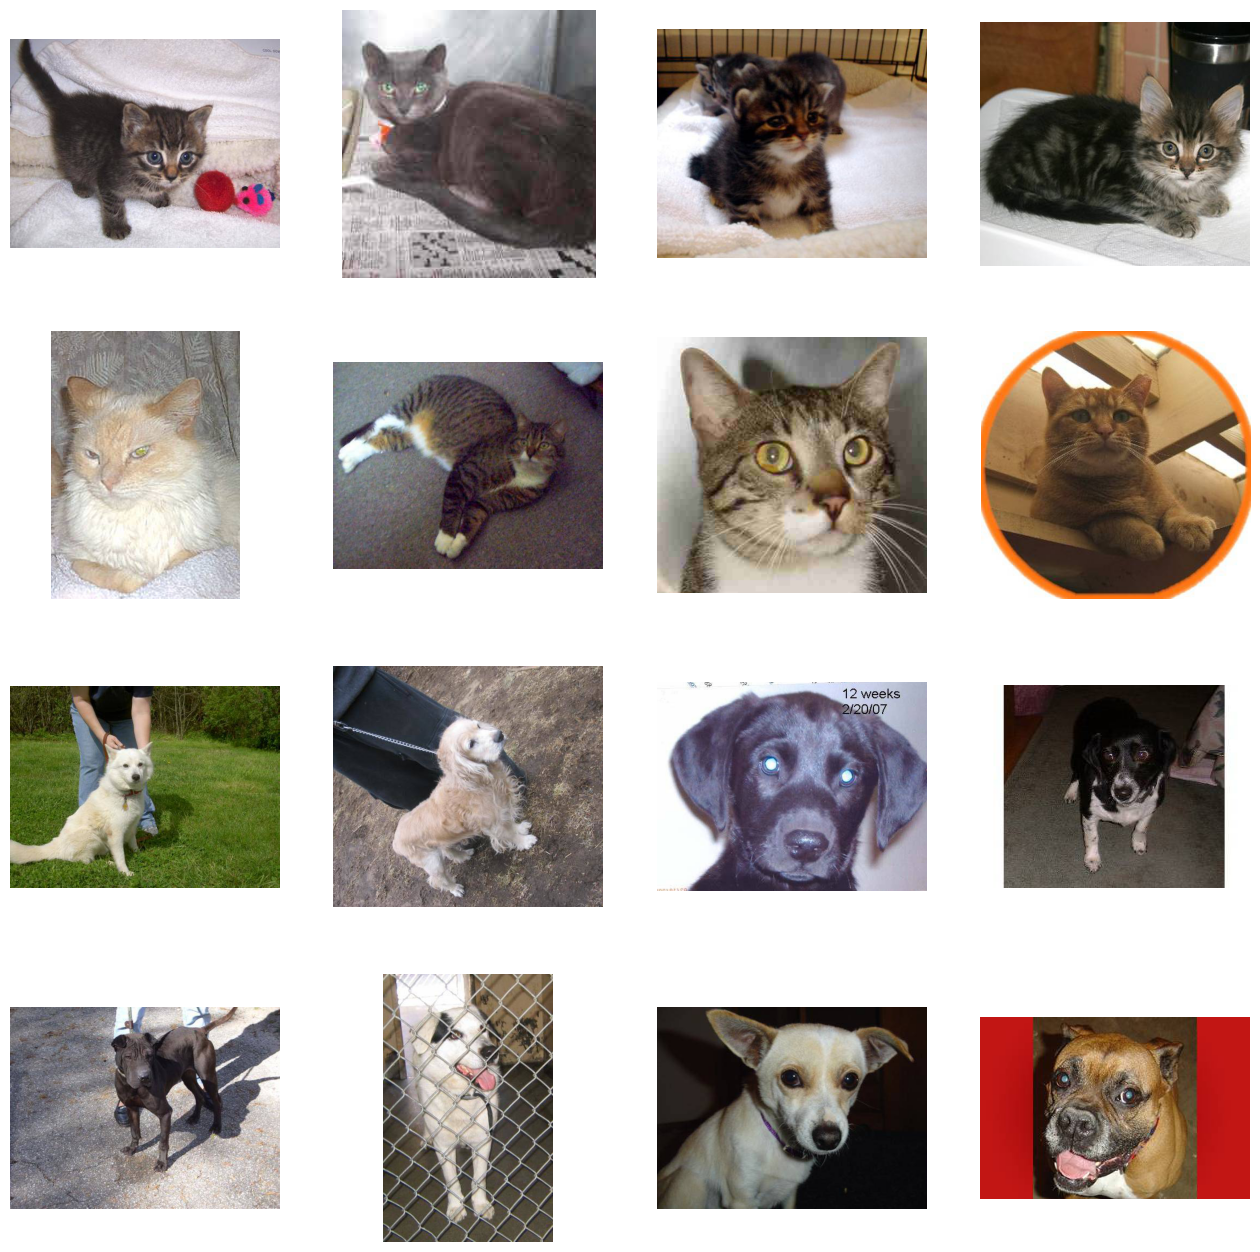

In [ ]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


*  Checking to see if the directories loaded 600 training and 200 validation images for each animal.


In [ ]:
# Cats and Dogs train + Validation.
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

# Lions and Tigers train + Validation.
print('total training lions images:', len(os.listdir(train_lions_dir)))
print('total training tigers images:', len(os.listdir(train_tigers_dir)))
print('total validation lions images:', len(os.listdir(validation_lions_dir)))
print('total validation tigers images:', len(os.listdir(validation_tigers_dir)))

total training cat images: 600
total training dog images: 600
total validation cat images: 200
total validation dog images: 200
total training lions images: 600
total training tigers images: 600
total validation lions images: 200
total validation tigers images: 200


#Data Augmentation



*  data preparation
*  uniform image resizing
*  conversion to greyscale
*  normalising pixel values.



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64x64
        batch_size=20,
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 2400 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# 1st CNN Model

A CNN model with 3 convolutional layers and about 192 Fully Connected Layers.

In [ ]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()

# Convolutional Layer 1
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Layer 2
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Convolutional Layer 3
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening Features.
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layers.
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a dropout rate of 0.2
cnn.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))

cnn.add(tf.keras.layers.Dense(4, activation='softmax'))


In [ ]:
# Choosing the optimiser and learning rate.
# Compile the model and run.
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = cnn.fit(x=train_generator, validation_data=validation_generator, epochs=15, verbose = 2)

Epoch 1/15
120/120 - 42s - loss: 1.3433 - accuracy: 0.3029 - val_loss: 1.2512 - val_accuracy: 0.3988 - 42s/epoch - 346ms/step
Epoch 2/15
120/120 - 41s - loss: 1.1863 - accuracy: 0.4379 - val_loss: 1.7639 - val_accuracy: 0.3200 - 41s/epoch - 343ms/step
Epoch 3/15
120/120 - 41s - loss: 1.1025 - accuracy: 0.4863 - val_loss: 1.0700 - val_accuracy: 0.4825 - 41s/epoch - 340ms/step
Epoch 4/15
120/120 - 42s - loss: 1.0412 - accuracy: 0.5392 - val_loss: 0.9743 - val_accuracy: 0.5263 - 42s/epoch - 349ms/step
Epoch 5/15
120/120 - 41s - loss: 0.9892 - accuracy: 0.5537 - val_loss: 1.1771 - val_accuracy: 0.4400 - 41s/epoch - 342ms/step
Epoch 6/15
120/120 - 46s - loss: 0.9817 - accuracy: 0.5671 - val_loss: 0.9982 - val_accuracy: 0.5138 - 46s/epoch - 380ms/step
Epoch 7/15
120/120 - 42s - loss: 0.9327 - accuracy: 0.5996 - val_loss: 1.0008 - val_accuracy: 0.5263 - 42s/epoch - 347ms/step
Epoch 8/15
120/120 - 43s - loss: 0.9001 - accuracy: 0.6062 - val_loss: 1.2826 - val_accuracy: 0.4325 - 43s/epoch - 357

# 2nd CNN Model

Smaller CNN model two convolutional layers but with more Fully Connected Layers.


In [ ]:
fc_layer_size = 256
img_input = layers.Input(shape=(64, 64, 3))

# Convolutional Layer 1
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(img_input)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

# Convolutional Layer 2
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

# Flattening Features.
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer)

# Fully Connected Layers.
conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)

# Output layer.
conv_outputs = layers.Dense(4, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(img_input, outputs=conv_outputs)

In [ ]:
# Choosing the optimiser and learning rate.
# Compile the model.
customAdam = keras.optimizers.Adam(learning_rate=1e-6)
conv_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Running the model.
print('# Fit model on training data')
history = conv_model.fit(x=train_generator, validation_data=validation_generator, epochs=15, verbose = 2)

# Fit model on training data
Epoch 1/15
120/120 - 32s - loss: 0.7143 - accuracy: 0.6946 - val_loss: 1.3197 - val_accuracy: 0.5275 - 32s/epoch - 263ms/step
Epoch 2/15
120/120 - 30s - loss: 0.6932 - accuracy: 0.7100 - val_loss: 1.0669 - val_accuracy: 0.5800 - 30s/epoch - 252ms/step
Epoch 3/15
120/120 - 28s - loss: 0.7212 - accuracy: 0.6921 - val_loss: 0.9380 - val_accuracy: 0.5900 - 28s/epoch - 232ms/step
Epoch 4/15
120/120 - 27s - loss: 0.7109 - accuracy: 0.7004 - val_loss: 1.4333 - val_accuracy: 0.4700 - 27s/epoch - 225ms/step
Epoch 5/15
120/120 - 27s - loss: 0.6866 - accuracy: 0.7113 - val_loss: 1.4284 - val_accuracy: 0.4988 - 27s/epoch - 223ms/step
Epoch 6/15
120/120 - 29s - loss: 0.6841 - accuracy: 0.7083 - val_loss: 0.8974 - val_accuracy: 0.6112 - 29s/epoch - 242ms/step
Epoch 7/15
120/120 - 27s - loss: 0.6933 - accuracy: 0.7183 - val_loss: 0.9906 - val_accuracy: 0.5800 - 27s/epoch - 224ms/step
Epoch 8/15
120/120 - 29s - loss: 0.6458 - accuracy: 0.7271 - val_loss: 1.2494 - val_accur

#Evaluation



*   following training of our classifier model
*   evaluating against test set
*   evaluating model ability to generalise to new data



## 1st CNN Model Evalutation

First Model Description:
* This model has about 3 layers.
* In total there are 128 filters in the layers
* The model also utilises a dropout layer.
* It uses an adam optimiser.

According to the evaluation, the model's overall:
* Validation Accuracy = 0.54 `[loss = 1.13]`
* Training Accuracy = 0.64 `[loss = 0.80]`

Based on the charts generated on the model:
* Suffers from Underfitting since training loss is higher than validation loss.
* Means that the model suffers from being unable to model the training data.
* Needs to reduce the loss by obtaining more proper training data.


In [ ]:
print('Overall Validation accuracy: {acc}, loss: {loss}'.format(acc=history.history['val_accuracy'][-1], loss=history.history['val_loss'][-1]))

Overall Validation accuracy: 0.5387499928474426, loss: 1.1255375146865845


In [ ]:
print('Overall Training accuracy: {acc}, loss: {loss}'.format(acc=history.history['accuracy'][-1], loss=history.history['loss'][-1]))

Overall Training accuracy: 0.6395833492279053, loss: 0.8006188869476318


<Figure size 640x480 with 0 Axes>

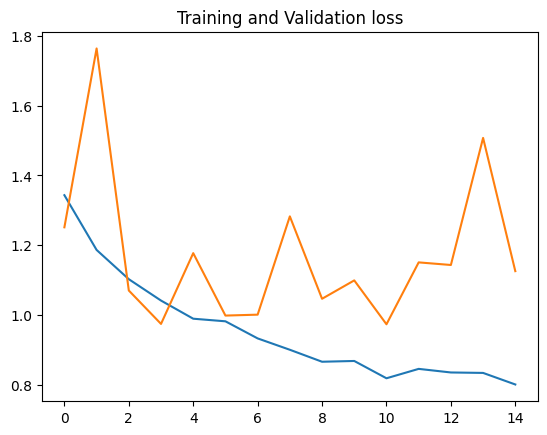

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')

plt.figure()


<Figure size 640x480 with 0 Axes>

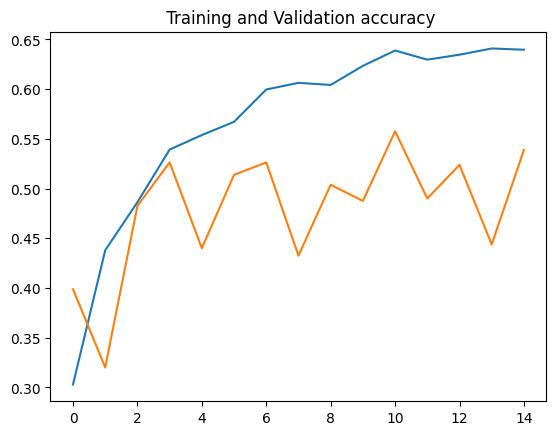

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot training and validation loss per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title(' Training and Validation accuracy')

plt.figure()


## 2nd CNN Model Evalutation

First Model Description:
* This model has about 2 layers.
* In total there are 96 filters in the layers
* The model has more than 500 hidden layers in the fully connected layers section.
* It uses an adam optimiser like the previous model, but there is no dropout layer.

According to the evaluation, the model's overall:
* Validation Accuracy = 0.50 `[loss = 1.50]`
* Training Accuracy = 0.75 `[loss = 0.60]`

Based on the charts generated on the model:
* Suffers from Underfitting since training loss is higher than validation loss.
* Means that the model suffers from being unable to model the training data.
* Needs to reduce the loss by obtaining more proper training data.
* There is a considerably bigger gap between the training and validation results in this model due to its bigger size in hidden layers tampering with the output results compared to the previous model.


In [ ]:
print('Overall Training accuracy: {acc}, loss: {loss}'.format(acc=history['accuracy'][-1], loss=history['loss'][-1]))

Overall Training accuracy: 0.7554166913032532, loss: 0.5998893976211548


In [ ]:
print('Overall Validation accuracy: {acc}, loss: {loss}'.format(acc=history['val_accuracy'][-1], loss=history['val_loss'][-1]))

Validation accuracy: 0.5012500286102295, loss: 1.4976086616516113


Overall during training the model has a 75% accuracy rate in identifying 4 classes of cats, dogs, tigers, and lions and only a 50% loss rate. However in the validation set it only has an accuracy of 50% with a high loss rate.

<Figure size 640x480 with 0 Axes>

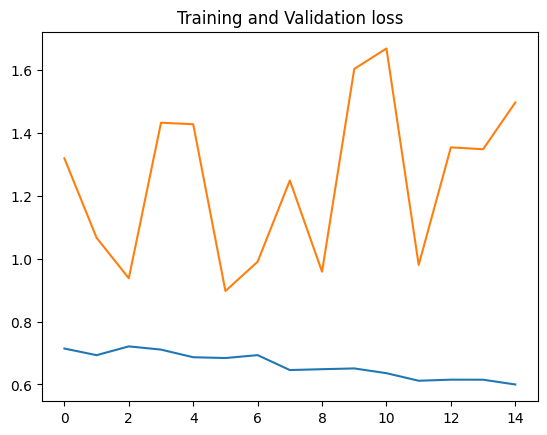

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')

plt.figure()


<Figure size 640x480 with 0 Axes>

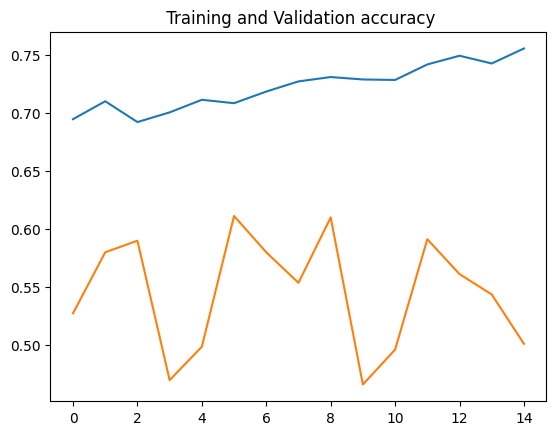

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot training and validation loss per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title(' Training and Validation accuracy')

plt.figure()
